## 0. Import Packages

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Gradient Vector Field and Contour

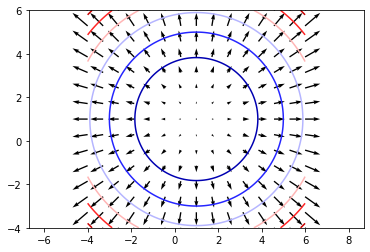

In [2]:
#define symbolic vars, function
x, y = sympy.symbols('x y')
fun = (x-1)**2+(y-1)**2

#take the gradient symbolically
gradfun = [sympy.diff(fun,var) for var in (x,y)]

#turn into a bivariate lambda for numpy
numgradfun = sympy.lambdify([x,y],gradfun)


x = np.linspace(-4, 6, 15)
y = np.linspace(-4, 6, 15) 
x1 = np.linspace(-4, 6, 100)
y1 = np.linspace(-4, 6, 100) 

X,Y = np.meshgrid(x, y)
X1, Y1 = np.meshgrid(x1, y1)
graddat = numgradfun(X,Y)
Z = (X1-1)**2 + (Y1-1)**2

plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.quiver(X,Y,graddat[0],graddat[1])
plt.contour(x1, y1, Z, cmap='seismic')

plt.show()

## 2. Linear Regression
- x = np.array([1, 2, 3])
- y = np.array([4.1, 6.9, 9.9])
- Hypothesis H = wx+b


w:  1.586666666666667 b:  0.6966666666666667 Cost:  10.741462962962963
w:  2.293555555555556 b:  1.0063333333333333 Cost:  2.133144736625514
w:  2.60862962962963 b:  1.1436555555555554 Cost:  0.42575532339734806
w:  2.749204691358025 b:  1.2042307407407407 Cost:  0.08709172114719783
w:  2.8120630205761317 b:  1.2306333950617283 Cost:  0.019900725349939568
w:  2.8403069319615915 b:  1.2418241181069958 Cost:  0.006553907014788303
w:  2.8531322067581164 b:  1.2462469865706447 Cost:  0.0038869871564097824
w:  2.859087779623533 b:  1.2476625132286236 Cost:  0.003338781974643884
w:  2.8619809798201596 b:  1.2477453726477215 Cost:  0.003211261129085523
w:  2.8635074480412075 b:  1.247241306085584 Cost:  0.0031676275036583387
w:  2.864422377738194 b:  1.246482352535451 Cost:  0.0031410702703845252
w:  2.8650621309532798 b:  1.2456163084009337 Cost:  0.003118327745189133
w:  2.865576541494896 b:  1.2447089180368511 Cost:  0.003096759393182396
w:  2.866032371856574 b:  1.2437893846008534 Cost:  

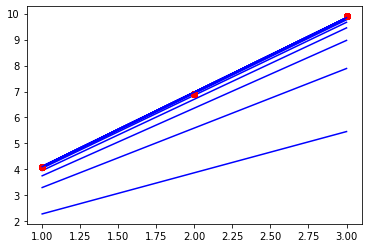

In [3]:
x = np.array([1, 2, 3])
y = np.array([4.1, 6.9, 9.9])
w = 0
b = 0
a = 0.05      # learning rate

H = w*x + b

for i in range(20):
    dw = 2*sum(x*(H-y))/len(y)
    db = 2*sum(H-y)/len(y)
    w = w - a*dw
    b = b - a*db

    H = w*x+b
    c = sum((H-y)*(H-y))/len(y)
    
    plt.plot(x, y, "ro")
    plt.plot(x, w*x+b, "b-") 
    
    print("w: ", w, "b: ", b, "Cost: ", c)
    
print("Prediction:", w*4+b)    

- x = np.array([1, 2, 3])
- y = np.array([4.1, 6.9, 9.9])
- Hypothesis H = wx

w:  1.586666666666667 Cost:  15.541496296296293
w:  2.432888888888889 Cost:  4.561418205761318
w:  2.8842074074074073 Cost:  1.4381959933424788
w:  3.1249106172839505 Cost:  0.5498127862544533
w:  3.2532856625514404 Cost:  0.2971171184605259
w:  3.3217523533607682 Cost:  0.2252392396213642
w:  3.3582679217924096 Cost:  0.2047939763071139
w:  3.3777428916226184 Cost:  0.19897843474217147
w:  3.38812954219873 Cost:  0.19732423625258796
w:  3.393669089172656 Cost:  0.19685370868221744
w:  3.3966235142254164 Cost:  0.1967198697288677
w:  3.398199207586889 Cost:  0.19668179998213717
w:  3.399039577379674 Cost:  0.1966709712541779
w:  3.399487774602493 Cost:  0.19666789108266977
w:  3.3997268131213296 Cost:  0.19666701494499628
w:  3.3998543003313757 Cost:  0.1966667657325026
w:  3.399922293510067 Cost:  0.19666669484539331
w:  3.3999585565387025 Cost:  0.19666667468194862
w:  3.3999778968206416 Cost:  0.19666666894656915
w:  3.3999882116376754 Cost:  0.19666666731517216
Prediction: 13.59995

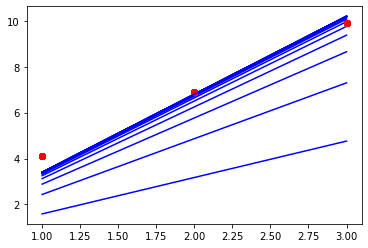

In [4]:
x = np.array([1, 2, 3])
y = np.array([4.1, 6.9, 9.9])
w = 0
a = 0.05      # learning rate

H = w*x

for i in range(20):
    g = 2*sum(x*(H-y))/len(y)
    w = w - a*g
    H = w*x
    c = sum((H-y)*(H-y))/len(y)
    plt.plot(x, y, "ro")
    plt.plot(x, w*x, "b-") 

    print("w: ", w, "Cost: ", c)
    
print("Prediction:", w*4)    

- x = np.array([30, 20, 40])
- y = np.array([6.1, 3.1, 6.8])
- Hypothesis H = w*x + b

In [5]:
x = np.array([30, 20, 40])
y = np.array([6.1, 3.1, 6.8])
w = 0
b = 0
a = 0.001      # learning rate

H = w*x + b

for i in range(1000):
    dw = 2*sum(x*(H-y))/len(y)
    db = 2*sum(H-y)/len(y)
    w = w - a*dw
    b = b - a*db

    H = w*x+b
    c = sum((H-y)*(H-y))/len(y)
    if i % 100 == 0:
        print("w: ", w, "b: ", b, "Cost: ", c)
    
print("Prediction:", w*25+b)    

w:  0.3446666666666667 b:  0.010666666666666666 Cost:  27.16708562962964
w:  0.1784041700910588 b:  0.0024629078261677556 Cost:  0.2972409816719897
w:  0.17829247047790894 b:  -0.0005424250099560584 Cost:  0.2971102467195272
w:  0.1783840228514668 b:  -0.0035003652573958647 Cost:  0.2970226733833154
w:  0.17847457052784338 b:  -0.006417814659193166 Cost:  0.29693748080630333
w:  0.17856387925085382 b:  -0.009295335080892234 Cost:  0.2968546042070466
w:  0.17865196567185065 b:  -0.012133473010365266 Cost:  0.29677398062521215
w:  0.1787388465192008 b:  -0.01493276744664607 Cost:  0.2966955488120573
w:  0.1788245382926983 b:  -0.017693750011875956 Cost:  0.29661924918389987
w:  0.17890905726631662 b:  -0.02041694505227746 Cost:  0.29654502377685077
Prediction: 4.451713595271376


## 2. Multi-Variable Linear regression

In [6]:
X = np.matrix([[30, 20, 40], [1, 2, 3], [5, 10, 15]])
Y = np.matrix([6.1, 3.1, 6.8])

W = np.matrix([0, 0, 0])
b = 0

a = 1e-4 # learning rate
H = W*X + b

for t in range(3000):
    dW = 2*((H-Y)*X.T)/Y.shape[1] # gradient
    db = 2*np.mean(H-Y) 
    W = W - a*dW 
    b = b - a*db
    c = (H-Y)*(H-Y).T/Y.shape[1] 
    H = W*X+b
    if t % 100 == 0:
        print('Iteration:', t, 'Cost:', c[0,0])
        
print('')
X_test = np.matrix([[25], [2], [10]])
print("Price Prediction:", (W*X_test+b)[0,0])

Iteration: 0 Cost: 31.019999999999996
Iteration: 100 Cost: 0.34082133458696035
Iteration: 200 Cost: 0.21074274888050268
Iteration: 300 Cost: 0.1305638504780756
Iteration: 400 Cost: 0.08114184956251845
Iteration: 500 Cost: 0.05067761941048248
Iteration: 600 Cost: 0.031898479662662904
Iteration: 700 Cost: 0.02032173588706472
Iteration: 800 Cost: 0.013184369717335368
Iteration: 900 Cost: 0.008783327191182105
Iteration: 1000 Cost: 0.00606888933209325
Iteration: 1100 Cost: 0.004394036161773092
Iteration: 1200 Cost: 0.003359961078985585
Iteration: 1300 Cost: 0.0027208498684453456
Iteration: 1400 Cost: 0.0023251889139681518
Iteration: 1500 Cost: 0.0020795890801245617
Iteration: 1600 Cost: 0.001926487676877947
Iteration: 1700 Cost: 0.0018304045201090295
Iteration: 1800 Cost: 0.0017694705183611975
Iteration: 1900 Cost: 0.001730206110082214
Iteration: 2000 Cost: 0.0017043028257053155
Iteration: 2100 Cost: 0.0016866395247191208
Iteration: 2200 Cost: 0.0016740596548655451
Iteration: 2300 Cost: 0.0